# Objectives

Focus on use of decision trees, random forests and gradient boosting for analyzing LendingClub data.

# LendingClub Loan Defaulters Prediction

Lending Club used to connect people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. Here I'm trying to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:

    credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

    purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

    int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

    installment: The monthly installments owed by the borrower if the loan is funded.

    log.annual.inc: The natural log of the self-reported annual income of the borrower.

    dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

    fico: The FICO credit score of the borrower.

    days.with.cr.line: The number of days the borrower has had a credit line.
    
    revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

    revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

    inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

    delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

    pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## Import Libraries

Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/DSO 530/labs/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loans = pd.read_csv('loan_data.csv')

1. Check out the info(), head(), and describe() methods on loans.

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

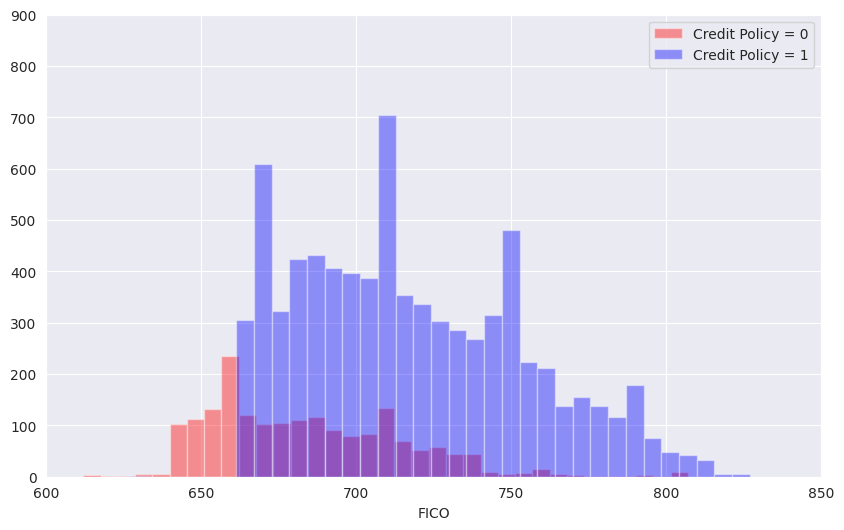

In [ ]:
plt.subplots(figsize = (10,6))
sns.distplot(loans[loans['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.distplot(loans[loans['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')



Create a similar figure, except this time select by the not.fully.paid column.



Text(0.5, 0, 'FICO')

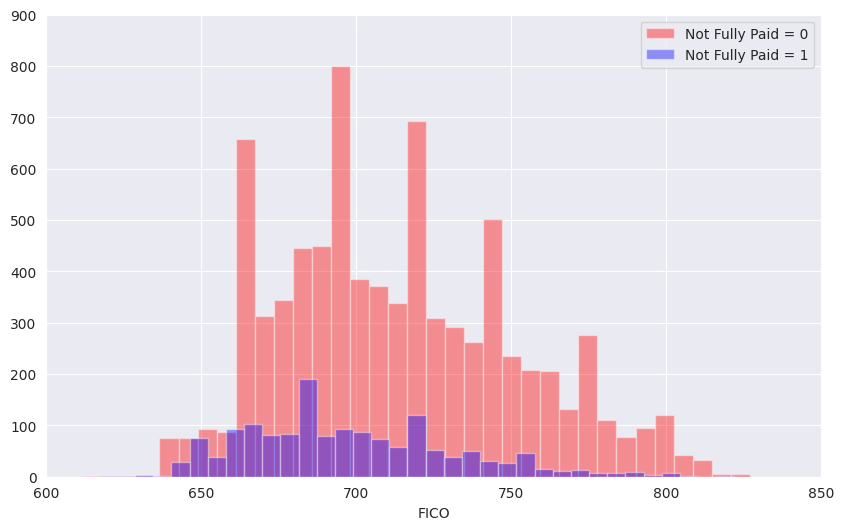

In [ ]:
plt.subplots(figsize = (10,6))
sns.distplot(loans[loans['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.distplot(loans[loans['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')




Create a countplot showing the counts of loans by purpose, with the color hue defined by not.fully.paid.



<Axes: xlabel='purpose', ylabel='count'>

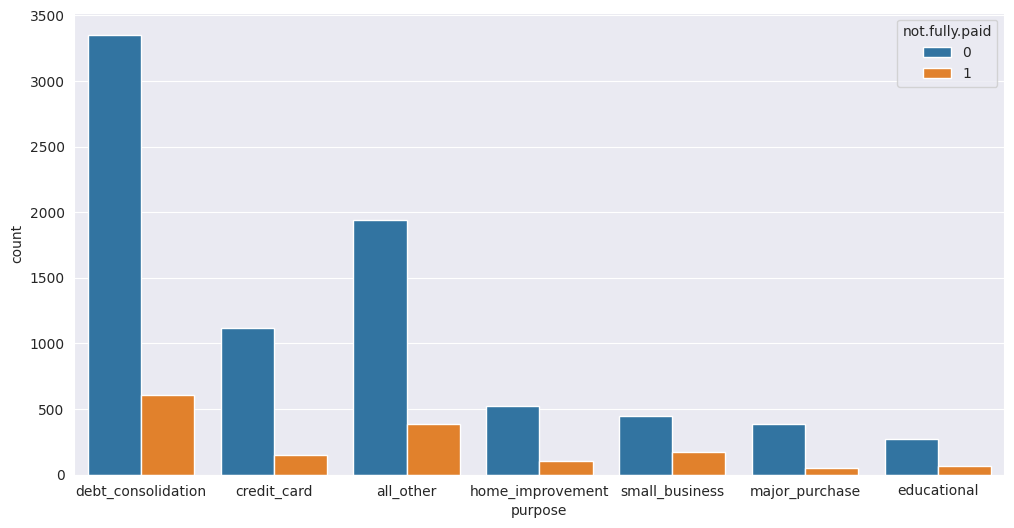

In [ ]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)

Trend between FICO score and interest rate. Recreate the following jointplot.

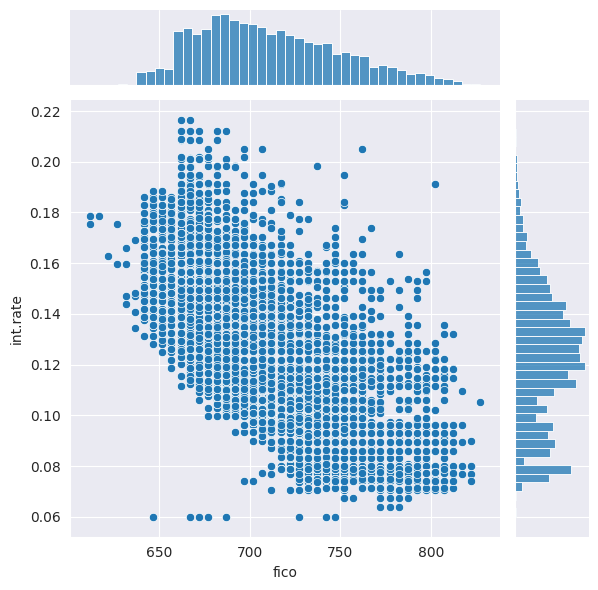

In [ ]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)



Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.



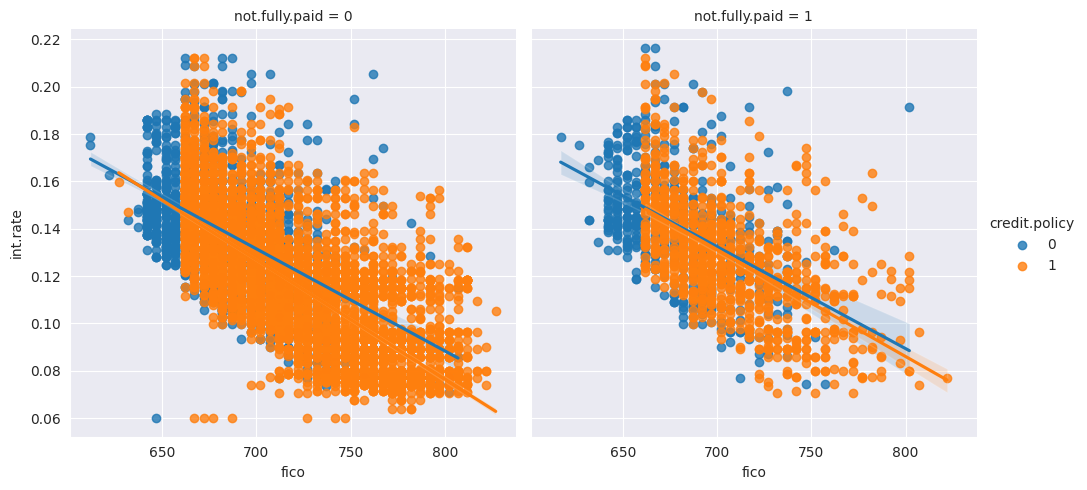

In [ ]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

## Setting up the data

Setting up our data for our Random Forest Classification Model

Check loans.info() again.



In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB



## Categorical Features

Notice that the purpose column is categorical. That means we need to do one-hot encoding before we proceed.

In [ ]:
cat_feats = ['purpose']

In [ ]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [ ]:
final_data.head()



,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False



## Train Test Split

Now its time to split our data into a training set and a testing set!

In [ ]:
# prompt: use SMOTE to handle class imbalance in y

from imblearn.over_sampling import SMOTE

# Assuming 'final_data' is your DataFrame and 'not.fully.paid' is your target variable
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

# Initialize SMOTE
smote = SMOTE(random_state=101)  # You can set a random state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=101)


# Building the prediction model

1. Train a decision tree model to predict y using the features in X. Implement cost-complexity pruning to obtain a pruned tree. Use the pruned tree to make predictions on the test set, and generate the confusion matrix. Calculate the accuracy on the test set.

In [ ]:
# prompt: Train a decision tree model to predict y using the features in X. Implement cost-complexity pruning to obtain a pruned tree. Use the pruned tree to make predictions on the test set, and generate the confusion matrix, and calculate the accuracy on the test set

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a decision tree classifier
dtree = DecisionTreeClassifier(random_state=101)

# Define the parameter grid for cost-complexity pruning
param_grid = {'ccp_alpha': np.linspace(0, 0.005, 20)}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator (pruned tree)
best_dtree = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dtree.predict(X_test)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[1801  579]
 [ 566 1881]]
Accuracy: 0.762792624818728


2. Now fit a random forest model with default value of max_features to predict y using X. Calculate the test set accuracy.

In [ ]:
# prompt: Now fit a random forest model with default value of max_features to predict y using X and calculate the test set accuracy. additionally, generate the confusion matrix and ROC AUC and print them

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a random forest classifier with default max_features
rfc = RandomForestClassifier(random_state=101)

# Fit the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate ROC AUC
y_pred_prob = rfc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)


Accuracy: 0.8450383260824529
Confusion Matrix:
 [[2103  277]
 [ 471 1976]]
ROC AUC: 0.9208073339675061


3. How does the above compare with bagging, i.e. when max_features= number of features?



In [ ]:
# prompt: How does the above model compare with bagging, i.e. when max_features= number of features?

# Create a random forest classifier with max_features equal to the number of features
rfc_bagging = RandomForestClassifier(max_features=X_train.shape[1], random_state=101)

# Fit the model
rfc_bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = rfc_bagging.predict(X_test)

# Calculate the accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)

# Generate the confusion matrix
confusion_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Bagging Confusion Matrix:\n", confusion_bagging)

# Calculate ROC AUC for bagging
y_pred_prob_bagging = rfc_bagging.predict_proba(X_test)[:, 1]
roc_auc_bagging = roc_auc_score(y_test, y_pred_prob_bagging)
print("Bagging ROC AUC:", roc_auc_bagging)


Bagging Accuracy: 0.8431738139631241
Bagging Confusion Matrix:
 [[2104  276]
 [ 481 1966]]
Bagging ROC AUC: 0.9152690827045981


4. Check the out-of-bag (OOB) error for different values of max_features. Figure out which one has the best OOB error and refit the random forest model with this max_features and report the test set accuracy.


In [ ]:
# prompt: calculate out-of-bag (OOB) error for different values of max_features. print which one has the best OOB error and refit the random forest model with this max_features and report the test set accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the range of max_features to test
max_features_range = range(1, len(X_train.columns) + 1)

# Store the OOB errors for each value of max_features
oob_errors = []

# Iterate over the range of max_features
for max_features in max_features_range:
    rfc = RandomForestClassifier(n_estimators=100, random_state=101, oob_score=True, max_features=max_features)
    rfc.fit(X_train, y_train)
    oob_error = 1 - rfc.oob_score_
    oob_errors.append(oob_error)

# Find the max_features with the lowest OOB error
best_max_features = max_features_range[np.argmin(oob_errors)]
print(f"Best max_features: {best_max_features} with OOB error: {min(oob_errors)}")

# Refit the random forest model with the best max_features
best_rfc = RandomForestClassifier(n_estimators=100, random_state=101, max_features=best_max_features)
best_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rfc = best_rfc.predict(X_test)

# Calculate the test set accuracy
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
print(f"Test set accuracy with best max_features: {accuracy_best_rfc}")


Best max_features: 6 with OOB error: 0.1555535825268578
Test set accuracy with best max_features: 0.8446239900559354


5. Plot the actual test set accuracies with respect to max_features. Compare to see which max_features has the best test set accuracy.


Best max_features (based on test accuracy): 12 with test accuracy: 0.8485601823078517


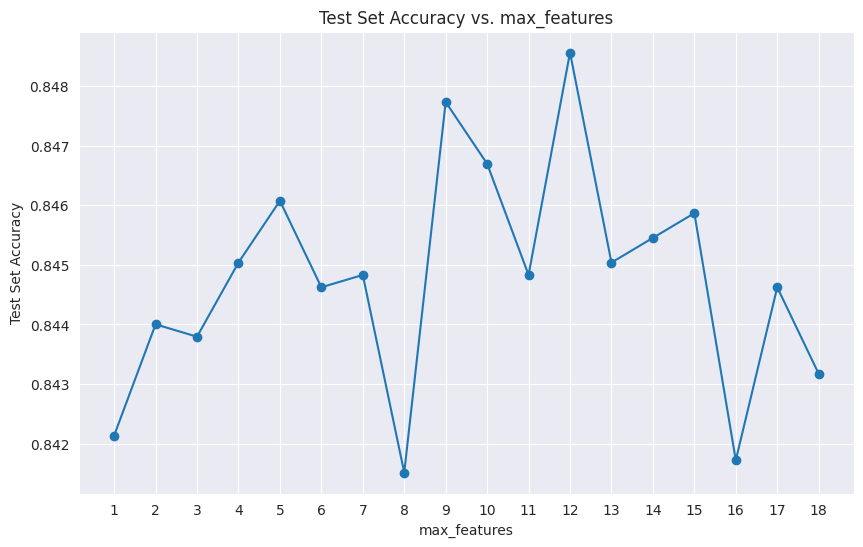

In [ ]:
# prompt: lot the actual test set accuracies with respect to max_features and display which max_features has the best test set accuracy

# Define the range of max_features to test
max_features_range = range(1, len(X_train.columns) + 1)

# Store the test set accuracies for each value of max_features
test_accuracies = []

# Iterate over the range of max_features
for max_features in max_features_range:
    rfc = RandomForestClassifier(n_estimators=100, random_state=101, max_features=max_features)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

# Find the max_features with the best test set accuracy
best_max_features = max_features_range[np.argmax(test_accuracies)]
print(f"Best max_features (based on test accuracy): {best_max_features} with test accuracy: {max(test_accuracies)}")

# Plot the test set accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, test_accuracies, marker='o')
plt.xlabel("max_features")
plt.ylabel("Test Set Accuracy")
plt.title("Test Set Accuracy vs. max_features")
plt.xticks(max_features_range)  # Ensure all x-axis values are displayed
plt.grid(True)
plt.show()


6. Fit a gradient boosting classifier to predict y from X. Use 500 trees. Tune the learning rate within [0.01, 0.05, 0.1] using 5-fold CV.

In [ ]:
# prompt: Fit a gradient boosting classifier to predict y from X. Use 500 trees. Tune the learning rate within [0.01, 0.05, 0.1] using 5-fold CV.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a gradient boosting classifier
gbc = GradientBoostingClassifier(n_estimators=500, random_state=101)

# Define the parameter grid for learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1]}

# Use GridSearchCV to find the best learning rate
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator (gradient boosting classifier with the best learning rate)
best_gbc = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred_gbc = best_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Test set accuracy:", accuracy_gbc)


Best hyperparameters: {'learning_rate': 0.1}
Test set accuracy: 0.850010358400663


7. With learning rate set as 0.1, compare the training set sccuracy for 100, 500, 1000, 2000 and 5000 trees.


In [ ]:
# prompt: With learning rate set as 0.1, compare the training set sccuracy for 100, 500, 1000, 2000 and 5000 trees.

# Define the number of trees to test
n_estimators_list = [100, 500, 1000, 2000, 5000]

# Store the training set accuracies for each number of trees
training_accuracies = []

# Iterate over the number of trees
for n_estimators in n_estimators_list:
    # Create a gradient boosting classifier with the specified number of trees and learning rate
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, random_state=101)

    # Fit the model to the training data
    gbc.fit(X_train, y_train)

    # Predict on the training set
    y_pred_train = gbc.predict(X_train)

    # Calculate the training accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(accuracy_train)

# Print the results
for i in range(len(n_estimators_list)):
    print(f"Number of trees: {n_estimators_list[i]}, Training Accuracy: {training_accuracies[i]}")


Number of trees: 100, Training Accuracy: 0.7889549853502619
Number of trees: 500, Training Accuracy: 0.8991387729734529
Number of trees: 1000, Training Accuracy: 0.9383823137707538
Number of trees: 2000, Training Accuracy: 0.9742519754949835
Number of trees: 5000, Training Accuracy: 0.9997336411258102


8. With learning rate set as 0.1, compare the test set sccuracy for 100, 500, 1000, 2000 and 5000 trees.


In [ ]:
# prompt: With learning rate set as 0.1, compare the test set sccuracy for 100, 500, 1000, 2000 and 5000 trees.

# Define the number of trees to test
n_estimators_list = [100, 500, 1000, 2000, 5000]

# Store the test set accuracies for each number of trees
test_accuracies = []

# Iterate over the number of trees
for n_estimators in n_estimators_list:
    # Create a gradient boosting classifier with the specified number of trees and learning rate
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, random_state=101)

    # Fit the model to the training data
    gbc.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = gbc.predict(X_test)

    # Calculate the test accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(accuracy_test)

# Print the results
for i in range(len(n_estimators_list)):
    print(f"Number of trees: {n_estimators_list[i]}, Test Accuracy: {test_accuracies[i]}")


Number of trees: 100, Test Accuracy: 0.7741868655479593
Number of trees: 500, Test Accuracy: 0.850010358400663
Number of trees: 1000, Test Accuracy: 0.8585042469442719
Number of trees: 2000, Test Accuracy: 0.8632691112492231
Number of trees: 5000, Test Accuracy: 0.8647192873420344


In [ ]:
!apt-get install -y pandoc
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/DSO530_Lab4._Ian_Cabeen.ipynb" --output-dir="/content/drive/MyDrive/DSO 530/Converted_PDFs"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DSO530_Lab4._Ian_Cabeen.ipynb to pdf
[NbConvertApp] Support files will be in DSO530_Lab4._Ian_Cabeen_files/
[NbConvertApp] Making directory ./DSO530_Lab4._Ian_Cabeen_files
[NbConvertApp] Writing 65022 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 299586 bytes to /content/drive/MyDrive/DSO 530/Converted_PDFs/DSO530_Lab4._Ian_Cabeen.pdf
